In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data=pd.read_csv('diabetes.csv')

# understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# E.D.A

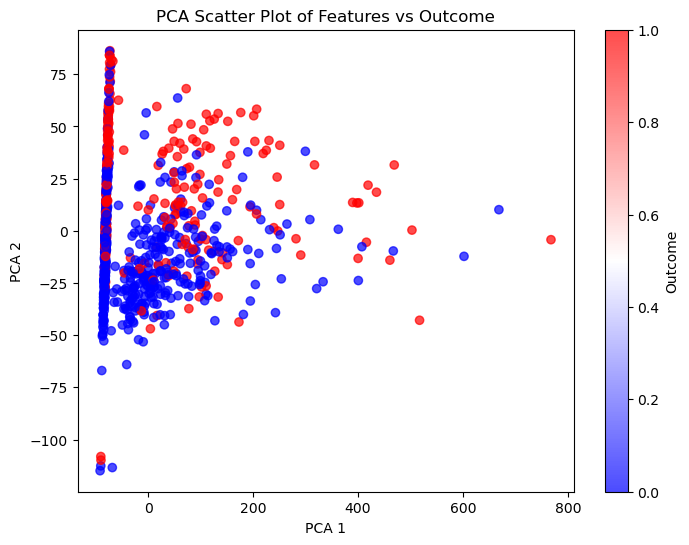

In [9]:
from sklearn.decomposition import PCA

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="bwr", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatter Plot of Features vs Outcome")
plt.colorbar(label="Outcome")
plt.show()

# train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Outcome',axis=1),data['Outcome'],test_size=0.2,random_state=2)

# model selection

In [11]:
clf=LinearRegression()

In [12]:
clf.fit(x_train,y_train)

LinearRegression()

In [13]:
y_predict=clf.predict(x_test)
y_predict

array([ 1.90462826e-03,  2.39429343e-01,  1.10562272e-01,  3.11236987e-01,
        5.70174319e-01,  1.50343359e-01,  5.37976118e-02,  4.58059182e-01,
        4.81570449e-04,  5.49684168e-01,  4.03355822e-01,  4.30315206e-01,
        6.58903961e-01,  2.42115626e-01, -1.49374524e-01,  7.53330954e-01,
        8.07481119e-01, -6.07681249e-02,  3.16057021e-01,  8.52796982e-01,
        9.83320931e-01,  7.56821710e-01,  1.60464626e-01,  4.31005605e-01,
        1.13813261e-01,  4.87510105e-02,  5.78379810e-01,  4.25668664e-01,
        2.39461800e-01,  3.34672688e-01,  3.14173416e-01,  4.42232972e-01,
       -2.26999855e-01,  2.91254808e-01,  4.01255479e-01,  1.03437687e+00,
        3.72530667e-01,  7.22801124e-01,  3.49484092e-01,  2.25941837e-02,
        2.43506139e-01,  8.88253011e-02,  4.49445701e-01,  2.45962179e-01,
       -7.70729226e-02, -2.10660582e-02,  3.06661242e-01,  4.43499558e-01,
        1.24883978e-01,  4.24915795e-01,  1.30895173e+00,  1.50886052e-01,
        4.16533644e-01,  

In [14]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64

# Regression metrics

In [15]:
mean_absolute_error(y_test,y_predict)

0.3347207586149435

In [16]:
mean_squared_error(y_test,y_predict)

0.16727932535648787

In [17]:
r2_score(y_test,y_predict)

0.19119337815403337

# Calculating coefficient and intercept

In [18]:
clf.coef_

array([ 0.02604481,  0.00636631, -0.00238738,  0.00072783, -0.00022277,
        0.01275374,  0.16008617,  0.00127011])

In [19]:
clf.intercept_

-0.870236691911783

# Making a multiple linear regression class from scratch

In [35]:
class meralr:
    def __init__(self):
        self.coef_=None
        self.intercept_=None
    
    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)

        # calculate the coefficient
        betas= np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]

    def predict(self,x_test):
         y_predict=np.dot(x_test,self.coef_)+self.intercept_
         return y_predict

In [36]:
lr=meralr()

In [37]:
lr.fit(x_train,y_train)

In [38]:
lr.predict(x_test)

array([ 1.90462826e-03,  2.39429343e-01,  1.10562272e-01,  3.11236987e-01,
        5.70174319e-01,  1.50343359e-01,  5.37976118e-02,  4.58059182e-01,
        4.81570449e-04,  5.49684168e-01,  4.03355822e-01,  4.30315206e-01,
        6.58903961e-01,  2.42115626e-01, -1.49374524e-01,  7.53330954e-01,
        8.07481119e-01, -6.07681249e-02,  3.16057021e-01,  8.52796982e-01,
        9.83320931e-01,  7.56821710e-01,  1.60464626e-01,  4.31005605e-01,
        1.13813261e-01,  4.87510105e-02,  5.78379810e-01,  4.25668664e-01,
        2.39461800e-01,  3.34672688e-01,  3.14173416e-01,  4.42232972e-01,
       -2.26999855e-01,  2.91254808e-01,  4.01255479e-01,  1.03437687e+00,
        3.72530667e-01,  7.22801124e-01,  3.49484092e-01,  2.25941837e-02,
        2.43506139e-01,  8.88253011e-02,  4.49445701e-01,  2.45962179e-01,
       -7.70729226e-02, -2.10660582e-02,  3.06661242e-01,  4.43499558e-01,
        1.24883978e-01,  4.24915795e-01,  1.30895173e+00,  1.50886052e-01,
        4.16533644e-01,  

In [39]:
r2_score(y_test,y_predict)

0.19119337815403337

In [40]:
lr.coef_

array([ 0.02604481,  0.00636631, -0.00238738,  0.00072783, -0.00022277,
        0.01275374,  0.16008617,  0.00127011])

In [41]:
lr.intercept_

-0.8702366919117749